## Important Code for importing

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'urdu-stopwords:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F3741921%2F6477352%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240427%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240427T111438Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D20397ee1614a33e42da4aad6dd3a3995a962fa15ea1134abfb33239215a2b939683b68a963d0eb9328a5502ae29dc5b4b4145b681f4cd0ad9c1cc6883416b87e3c0fb7b9bba8f372c65bda06a4503e5f3c99f499d2413d9e80f5e5f0d5d6121a0d0914f2f7a99a0b6817f9950b593cb74bafbb4136ee7345a8c8f2faaa93b2a8e6819d9a5e919ef499c3f0eff19b546d974ea1952abd4734e3fa95e9ccc4aa188a19e6bfeb4c4e8e939c90446834233a0d2813f1f3aa70fedf478b55e49ca97aed3cc28f38f5e913a7fb71d21cbf45b54d171e17da16f73c8777cd594209ea1139c7c74f6195d97acc1df235b8aac1729c174f758c620a6be28e49265a1ad6ef'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 758 bytes downloaded
Downloaded and uncompressed: urdu-stopwords
Data source import complete.


In [ ]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 388.9/388.9 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datasets
from sklearn.model_selection import train_test_split
import tensorflow as tf
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urdu-stopwords/urdu_stopwords.csv


In [ ]:
!pip install keras

## Dataset

In [ ]:
dataset = datasets.load_dataset("imdb_urdu_reviews")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'sentiment'],
        num_rows: 50000
    })
})

In [ ]:
df = pd.DataFrame(dataset['train'])
df.head()

,sentence,sentiment
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,0
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,1
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,0
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,1
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,0


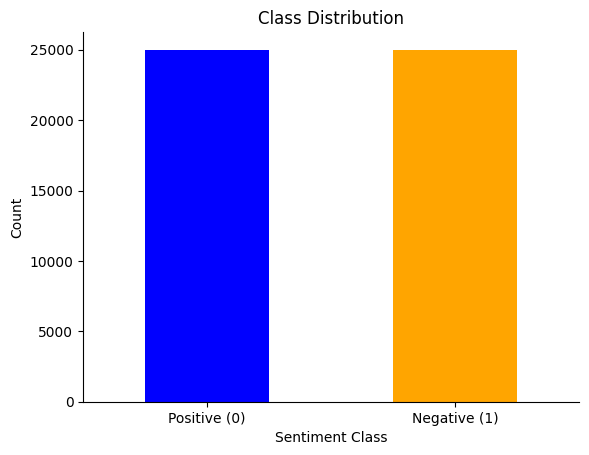

In [ ]:
from matplotlib import pyplot as plt

class_counts = df['sentiment'].value_counts()

class_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Class Distribution')
plt.xlabel('Sentiment Class')
plt.ylabel('Count')
plt.xticks([0, 1], ['Positive (0)', 'Negative (1)'], rotation=0)
plt.gca().spines[['top', 'right']].set_visible(False)
plt.show()

## Preprocessing

In [ ]:
import re
from nltk.stem import PorterStemmer
import nltk
nltk.download('punkt')
stemmer = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import csv
def stopwords_loader(path):
    stopwords = set()
    with open(path, newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if row[0] == 'stopword':
                continue
            stopwords.add(row[0])
    return stopwords

stopwords = stopwords_loader('/kaggle/input/urdu-stopwords/urdu_stopwords.csv')
stopwords

{'آتےہیں',
 'آدھا',
 'آپ',
 'آپ کی',
 'آپکا',
 'آپکی',
 'آپکے',
 'اس',
 'اسی',
 'اسے',
 'ان ',
 'انکا',
 'انکو ',
 'انکی ',
 'انکے',
 'اهپر',
 'اور',
 'اپنا ',
 'اپنی ',
 'اپنے',
 'اچھے',
 'اکٹھی',
 'اکٹھے',
 'اگر',
 'اگر ',
 'اگرتو ',
 'بعضے',
 'بلکہ',
 'بڑھ',
 'تاکہ',
 'تم ',
 'تمہارا',
 'تمہاری',
 'تمہاری ',
 'تمہارے',
 'تو',
 'توہی',
 'تیرا ',
 'تیری',
 'تیرے',
 'جاؤ',
 'جارہاہے',
 'جب',
 'جبتک',
 'جبکہ',
 'جلدہی',
 'جنہوں',
 'جو',
 'جیسے',
 'دیکھو',
 'دیکھی',
 'رہتےہیں',
 'زریعہ',
 'زکن',
 'زیادہ',
 'ساتھ',
 'سب',
 'سبھی',
 'سکھائے',
 'سیکھو',
 'طرف',
 'عموماً',
 'فرد',
 'فلاں',
 'لئے',
 'لوجب',
 'لگا',
 'لگانے',
 'لگا۔',
 'لگی',
 'لگیں',
 'لگے',
 'لہذا',
 'لیکن',
 'لےلیتے',
 'مختلف',
 'موجود',
 'میرا',
 'میری',
 'میرے',
 'میں',
 'وہ ',
 'وہاں',
 'پر',
 'پڑتا',
 'پڑتی',
 'پڑتے',
 'پہنچ',
 'پہنچوں',
 'پہنچی',
 'پہنچیں',
 'چند',
 'چونکہ',
 'کا',
 'کاہے',
 'کب',
 'کبھی',
 'کر',
 'کردیا',
 'کرهں',
 'کرکے ',
 'کر۔',
 'کو',
 'کوئی',
 'کون',
 'کچھ',
 'کھولے',
 'کہاں',
 'کی',
 'کیا',
 'کی

In [ ]:
maxlen = 0
def data_cleaning(text, stopwords):
    text = text.lower()
    text = re.sub("[^\u0600-\u06FF\s]", ' ', text)
    text = nltk.word_tokenize(text)
    text = [t for t in text if len(t) > 1]
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text.reverse()

    global maxlen
    maxlen = max(len(text),maxlen)

    return ' '.join(text)

df['clean_text'] = df['sentence'].apply(data_cleaning,stopwords=stopwords)
df.head()

,sentence,sentiment,clean_text
0,میں نے اسے 80 کی دہائی کے وسط میں ایک کیبل گائ...,0,کرتے کہ ہے نہیں فرق سے کہتے کہ ہے نہیں فرق سے ...
1,چونکہ میں نے 80 کی دہائی میں انسپکٹر گیجٹ کارٹ...,1,تھا۔ بہتر کہیں سے فلم یہ دیکھیں۔ کارٹون بجائے ...
2,ایک ایسے معاشرے کی حالت کے بارے میں تعجب کرتا ...,0,ہے۔ دیتی سوالات کہیں سے جوابات ہمیں فلم تک دیر...
3,مفید البرٹ پیون کی طرف سے ایک اور ردی کی ٹوکری...,1,ہو ممکن یہ بدتر بھی سے طور مبینہ کھلونے شیطانی...
4,یہ کولمبو ہے جس کی ہدایتکاری اپنے کیریئر کے اب...,0,انتہائی دو۔ مت بڑھا توقعات بھی نام اسپلبرگ منس...


In [ ]:
maxlen

2189

In [ ]:
tok = tf.keras.preprocessing.text.Tokenizer(num_words=10000, oov_token='UNK')
tok.fit_on_texts(df['clean_text'])

In [ ]:
train_data, remaining_data = train_test_split(df, test_size=0.2, random_state=42)
validation_data, test_data = train_test_split(remaining_data, test_size=0.5, random_state=42)

In [ ]:
trainValue = tok.texts_to_sequences(train_data['clean_text'])

In [ ]:
VOCABSIZE = len(tok.word_index) + 1
VOCABSIZE

111221

In [ ]:
trainValue =  tf.keras.preprocessing.sequence.pad_sequences(trainValue, maxlen)

In [ ]:
validationValue = tok.texts_to_sequences(validation_data['clean_text'])
validationValue =  tf.keras.preprocessing.sequence.pad_sequences(validationValue, maxlen)

## Model

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Embedding(VOCABSIZE, 600),
  tf.keras.layers.GRU(256),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(12, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_10 (Embedding)    (None, None, 600)         66732600  
                                                                 
 gru_17 (GRU)                (None, 256)               658944    
                                                                 
 dropout_10 (Dropout)        (None, 256)               0         
                                                                 
 dense_20 (Dense)            (None, 12)                3084      
                                                                 
 dense_21 (Dense)            (None, 1)                 13        
                                                                 
Total params: 67394641 (257.09 MB)
Trainable params: 67394641 (257.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Training

In [ ]:
history = model.fit(trainValue, train_data["sentiment"], epochs=2, validation_data=(validationValue,validation_data["sentiment"]))

Epoch 1/2
1250/1250 [==============================] - 251s 199ms/step - loss: 0.4930 - acc: 0.7566 - val_loss: 0.3886 - val_acc: 0.8304
Epoch 2/2
1250/1250 [==============================] - 215s 172ms/step - loss: 0.2710 - acc: 0.8925 - val_loss: 0.2992 - val_acc: 0.8754


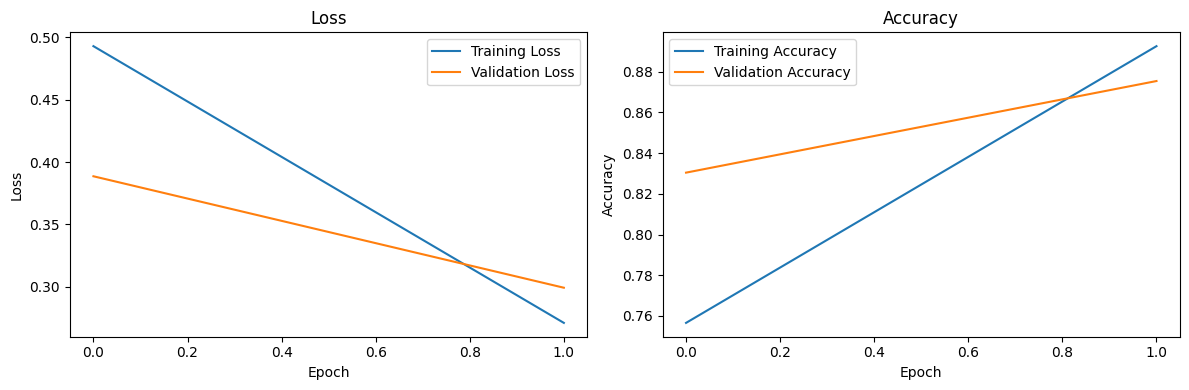

In [ ]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']

# Plotting the loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting the accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Displaying the plot
plt.tight_layout()
plt.show()

In [ ]:
testValue = tok.texts_to_sequences(test_data['clean_text'])
testValue =  tf.keras.preprocessing.sequence.pad_sequences(testValue, maxlen)

loss, accuracy = model.evaluate(testValue, test_data["sentiment"])

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


157/157 [==============================] - 9s 58ms/step - loss: 0.2894 - acc: 0.8808
Test Loss: 0.28943324089050293
Test Accuracy: 0.8808000087738037


In [ ]:
model.save('saved_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Inference

In [ ]:
model = tf.keras.models.load_model('/content/saved_model.h5')

In [ ]:
import csv
def stopwords_loader(path):
    stopwords = set()
    with open(path, newline='', encoding='utf-8') as file:
        reader = csv.reader(file)
        for row in reader:
            if row[0] == 'stopword':
                continue
            stopwords.add(row[0])
    return stopwords

stopwords = stopwords_loader('/kaggle/input/urdu-stopwords/urdu_stopwords.csv')

In [ ]:
def data_cleaning(text, stopwords):
    text = text.lower()
    text = re.sub("[^\u0600-\u06FF\s]", ' ', text)
    text = nltk.word_tokenize(text)
    text = [t for t in text if len(t) > 1]
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    text.reverse()

    return ' '.join(text)

In [ ]:
classes = {
    1 : "Negative",
    0 : "Positive"
}

In [ ]:
def inference(model,data):
  data = data_cleaning(data,stopwords)
  value = tok.texts_to_sequences([data])
  value = tf.keras.preprocessing.sequence.pad_sequences(value, 2189)
  prediction = model.predict(value)
  return classes[0] if prediction < 0.5 else classes[1]

In [ ]:
neg_sentence = "تقریباً ہر روز انسانوں کو اپنی زندگی میں کمیوں اور تنازعات کا سامنا ہوتا ہے۔ زندگی میں کامیابی کی بجائے ناکامیاں اور مشکلات ہی آئیں، اور یہ مشکلات کبھی کبھار بہت بڑی اور ناقابل حل معاملات بن جاتی ہیں۔ انسان کبھی کبھی مایوس ہو جاتا ہے اور زندگی کی اس چکریں اُسے نیچے دھکیل دیتی ہیں۔ بہت سے لوگوں کو اپنی زندگی کی بیماریاں، مالی مشکلات، اور رشتوں میں اختلافات کا سامنا کرنا پڑتا ہے، جو ان کی زندگی کو مایوس کن بنا دیتا ہے۔"
pos_sentence = "زندگی میں ہمیشہ خوشیوں اور کامیابیوں کی تلاش ہوتی ہے۔ ہر مشکل کے پیچھے ایک نیکی چھپی ہوتی ہے، جس کو پہچان کر آگے بڑھنا ہمیشہ ممکن ہوتا ہے۔ زندگی کی راہ میں آنے والے مسائل اور چیلنجز ہمیں مضبوط بناتے ہیں اور ہمیں سیکھنے کا مواقع دیتے ہیں۔ بہت سے لوگوں نے اپنے زندگی کے مشکلات کا سامنا کرکے ان کو میسر کیا اور اپنے مقصد تک پہنچا۔ وہ لوگ جو اپنی محنت، استقامت اور عزم سے گزرتے ہیں، ان کی کامیابی کبھی بھی محال نہیں ہوتی"

In [ ]:
print(inference(model,neg_sentence))

1/1 [==============================] - 0s 50ms/step
[[0.62895435]]
Negative


In [ ]:
print(inference(model,pos_sentence))

1/1 [==============================] - 0s 51ms/step
[[0.23886132]]
Positive
